<a href="https://colab.research.google.com/github/simonepascucci/progettoLAB-IA/blob/main/finalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import easyocr
reader = easyocr.Reader(['en'])


In [3]:
def display(img, title):
  print(title)
  print()
  cv2_imshow(img)

In [ ]:
from google.colab import drive
drive.mount()

In [4]:
cd ./drive/MyDrive/tensorflow-yolov4-tflite-master

/content/drive/MyDrive/tensorflow-yolov4-tflite-master


In [77]:
img_number = str(np.random.randint(0, 433))
print(img_number)
command = 'python detect.py --weights ./checkpoints/custom-416 --size 416 --model yolov4 --images ./data/images/Cars'+img_number+'.png --crop'

312


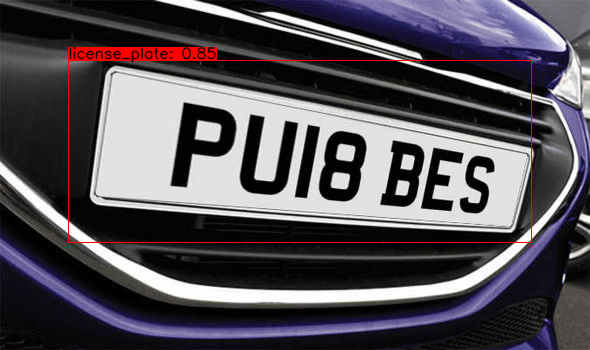

In [78]:
!{command}
res = cv2.imread("/content/drive/MyDrive/tensorflow-yolov4-tflite-master/detections/detection1.png")
cv2_imshow(res)

0 - Recognized plate with my YOLO v4 custom model:



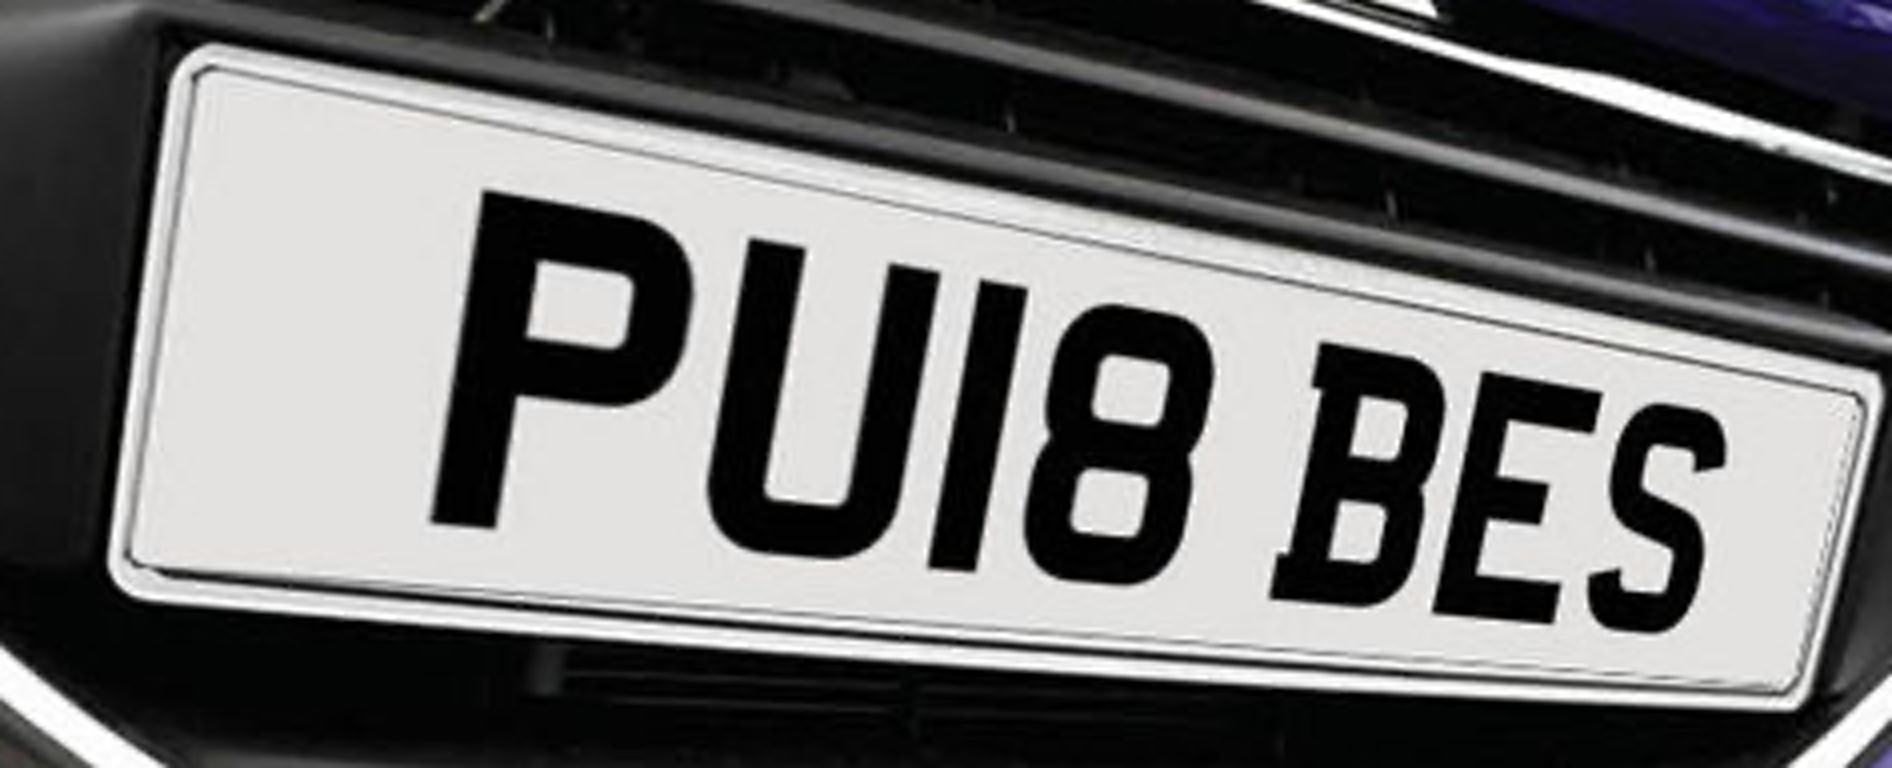

In [79]:
plate_PATH = '/content/drive/MyDrive/tensorflow-yolov4-tflite-master/detections/crop/Cars'+img_number+'/license_plate_1.png'
p = cv2.imread(plate_PATH)
from scipy.ndimage import interpolation
plate = cv2.resize(p, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
display(plate, '0 - Recognized plate with my YOLO v4 custom model:')

1 - Gaussian blur on grayscale plate: 



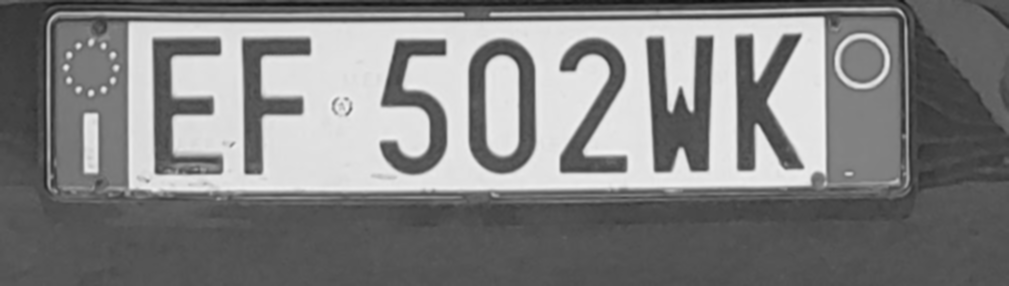

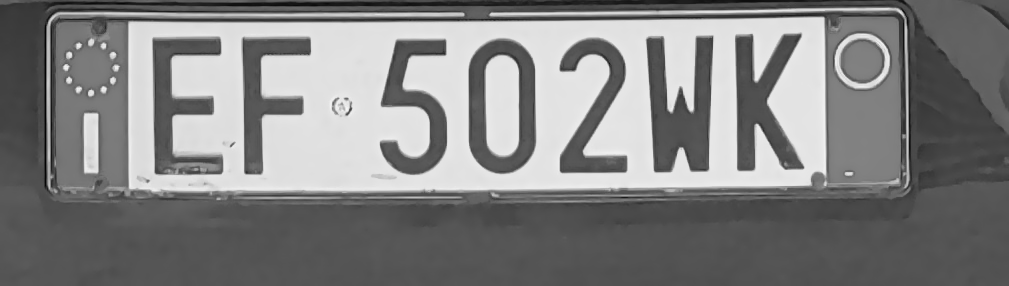

In [107]:
gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
#gray = cv2.bitwise_not(gray)
gblur = cv2.GaussianBlur(gray, (5, 5), 0)
bfilter = cv2.bilateralFilter(gray, 11, 10, 10)
display(gblur, '1 - Gaussian blur on grayscale plate: ')
display(bfilter, '')

2 - Binarization with OTSU thresholding method (For white plates)



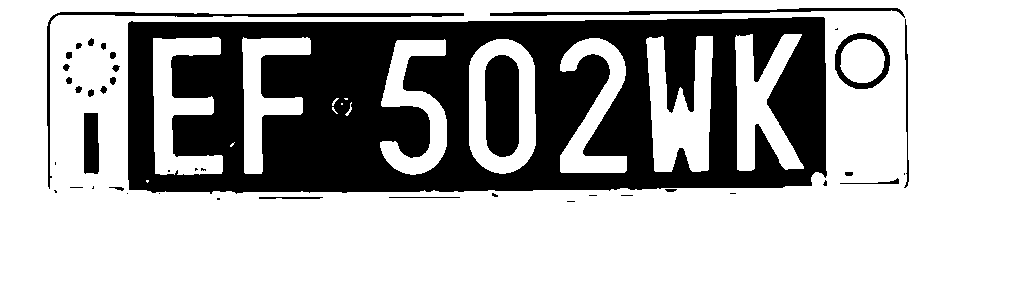

In [108]:
ret, thresh = cv2.threshold(bfilter, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
display(thresh, '2 - Binarization with OTSU thresholding method (For white plates)')

3 - Dilation (for plates with thin characters)



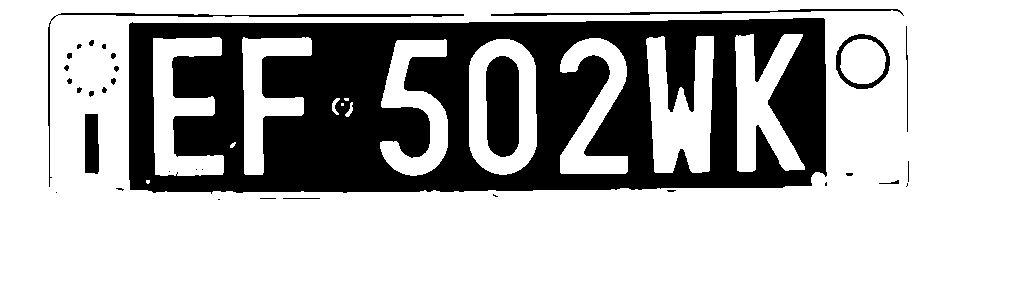

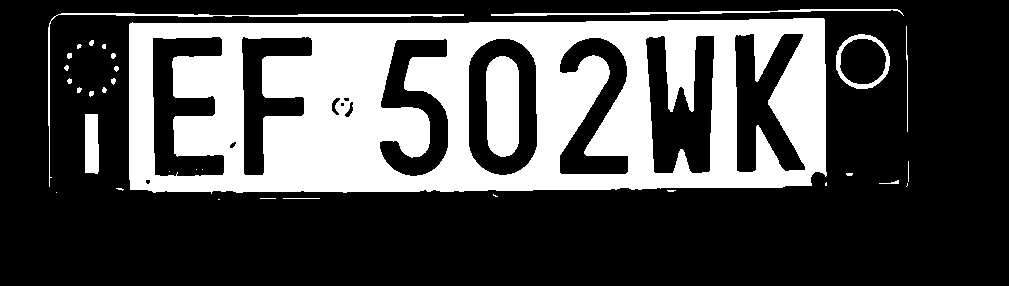

In [109]:
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
dilation = cv2.dilate(thresh, rect_kern, iterations = 1)
display(dilation, '3 - Dilation (for plates with thin characters)')
display(cv2.bitwise_not(dilation), '')

3 - Erosion (for plates with thick characters)



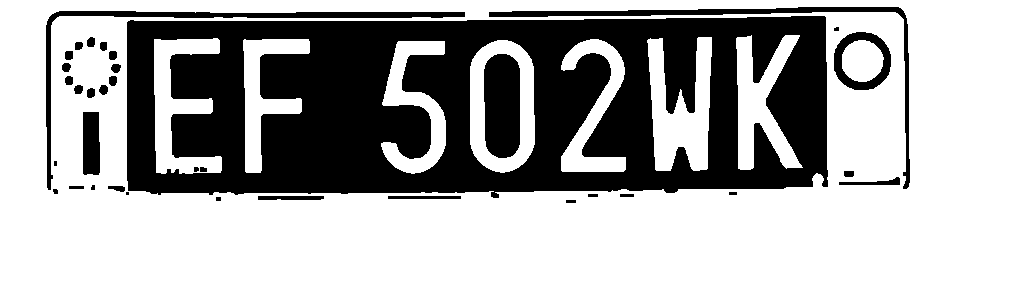

In [110]:
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
erosion = cv2.erode(thresh, rect_kern, iterations = 1)
display(erosion, '3 - Erosion (for plates with thick characters)')

In [ ]:
try:
    contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
except:
    ret_img, contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
im_cnts = gray.copy()
im_cnts = cv2.drawContours(im_cnts, contours, -1, (0,255,0), 2)
display(im_cnts, 'contours')
edg = cv2.Canny(im_cnts, 200, 255)
display(edg, '')

In [114]:
res1 = reader.readtext(dilation)
res2 = reader.readtext(cv2.bitwise_not(dilation))
res3 = reader.readtext(cv2.bitwise_not(erosion))
print()
plate_num = ''
for i in range(len(res1)):
  print(res1[i])

for i in range(len(res2)):
  print(res2[i])

for i in range(len(res3)):
  print(res3[i])
  
  plate_num += res3[i][-2]

print()
print(plate_num.upper().strip())


([[142, 18], [830, 18], [830, 190], [142, 190]], 'EF 502HK', 0.3533476073284769)
([[140, 18], [330, 18], [330, 190], [140, 190]], 'EF', 0.9991110701434338)
([[328, 88], [358, 88], [358, 124], [328, 124]], '()', 0.5286919491408311)
([[370, 20], [824, 20], [824, 190], [370, 190]], '502WK', 0.9237202559336729)
([[142, 18], [823, 18], [823, 191], [142, 191]], 'EF 502WK', 0.6313890144069827)

EF 502WK


In [115]:
command2 = 'python detect.py --weights ./checkpoints/custom-416 --size 416 --model yolov4 --images ./data/myImages/2.png --crop'

In [88]:
!{command2}

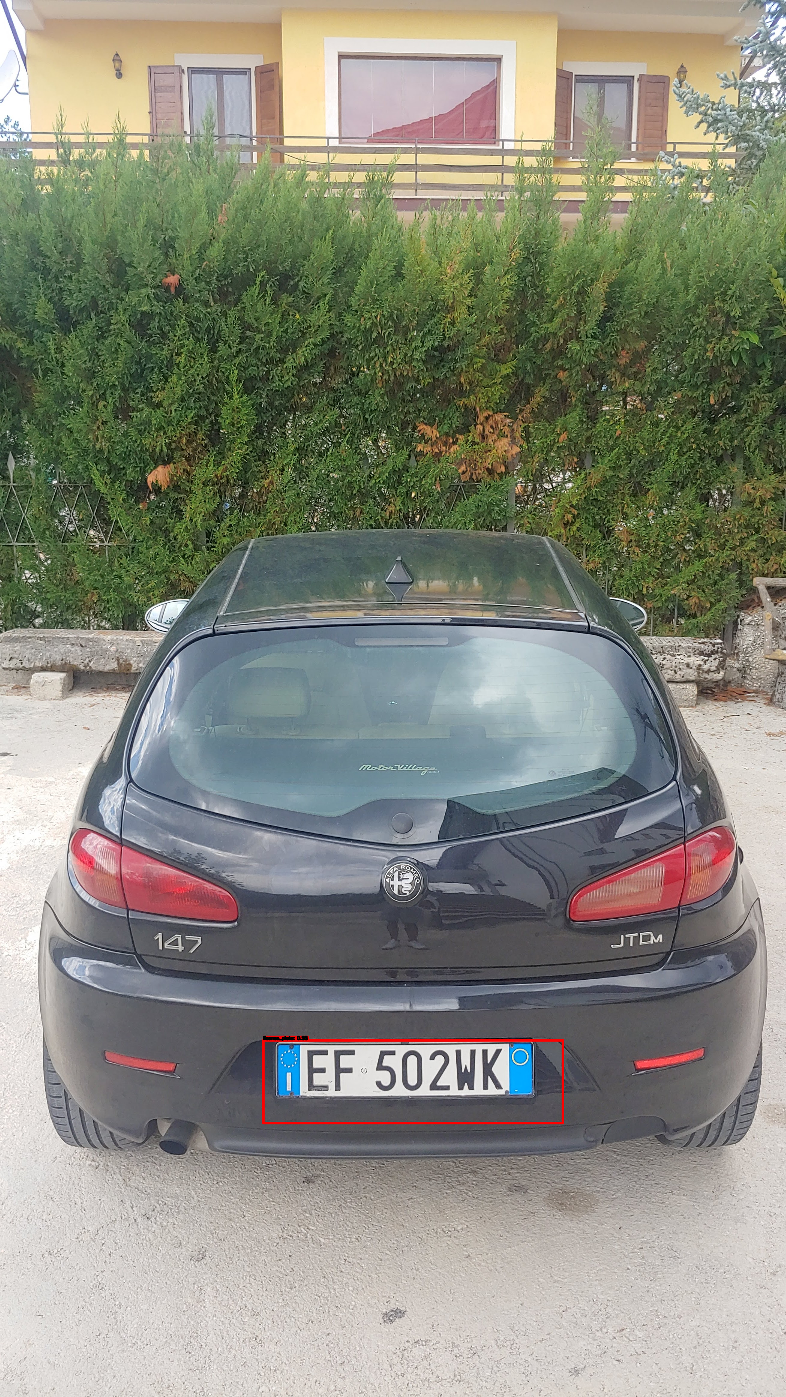

In [90]:
res = cv2.imread("/content/drive/MyDrive/tensorflow-yolov4-tflite-master/detections/detection1.png")
res = cv2.resize(res, None, fy=0.3, fx=0.3, interpolation=cv2.INTER_CUBIC)
cv2_imshow(res)

0 - Recognized plate with my YOLO v4 custom model:



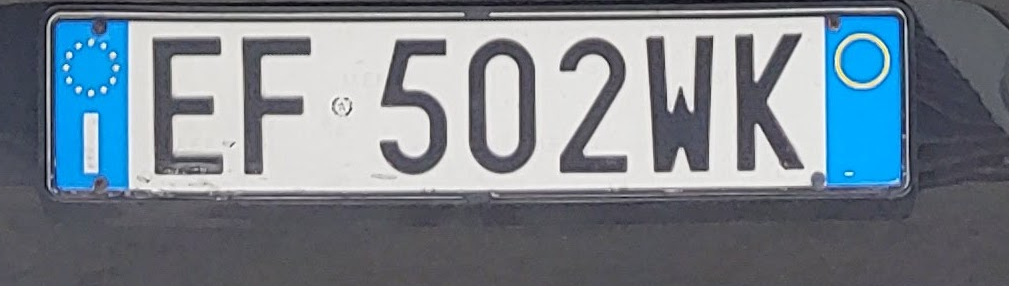

In [104]:
plate_PATH = '/content/drive/MyDrive/tensorflow-yolov4-tflite-master/detections/crop/2/license_plate_1.png'
p = cv2.imread(plate_PATH)
from scipy.ndimage import interpolation
plate = cv2.resize(p, None, fx=1, fy=1, interpolation=cv2.INTER_CUBIC)
display(plate, '0 - Recognized plate with my YOLO v4 custom model:')